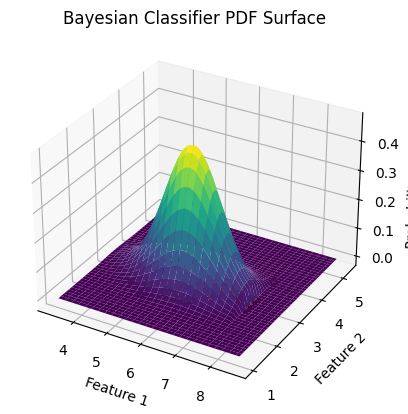

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#creating a probability Distribution function for multivariate data
def prob(sample, data):
  d = data.shape[1]
  mean = np.sum(data, axis=0) / len(data) #axis=0 implies that mean for each column
  cov_matrix = covmat(data)  #covariance matrix using user defined function
  inverse_covmat = np.linalg.inv(cov_matrix)  #using inbuilt numpy function to find inverse
  diff = sample - mean  #(x-mean)
  #the complete probaility fn:
  prob_fn = (np.exp(-(1/2)*np.dot(np.dot(diff, inverse_covmat), diff.T))) / (((2 * np.pi)**(d /2))*(np.sqrt(np.abs(np.linalg.det(cov_matrix)))))
  return prob_fn

#creating covariance matrix (previously studied)
def covmat(data):
  num_features = data.shape[1]
  num_sample = len(data)
  cov_matrix = np.zeros((num_features, num_features))
  mean = np.sum(data, axis=0) / num_sample
  for i in range(num_features):
    for j in range(num_features):
      cov=0
      for k in range (num_sample):
        cov += np.sum((data[k, i] - mean[i]) * (data[k, j] - mean[j])) / num_sample
      cov_matrix[i, j] = cov
  return cov_matrix

#creating a 3d graph using train and test sets
from mpl_toolkits.mplot3d import Axes3D
def plot_bayesian_pdf(x_train,y_train,x_test,y_test):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # defining a meshgrid of points to evaluate the PDF
  x_min,x_max=x_train[:,0].min()-1,x_train[:,0].max()+1
  y_min,y_max=x_train[:,1].min()-1,x_train[:,1].max() +1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
  #computing the PDF for each point on the meshgrid
  Z = np.zeros(xx.shape)
  for i in range(len(xx)):
    for j in range(len(yy)):
      sample = np.array([xx[i, j], yy[i, j]])
      Z[i, j] = prob(sample, x_train[:, :2]) # considering onlyfirst two features
  #plottong the 3D surface
  ax.plot_surface(xx, yy, Z, cmap='viridis')
  #scatter plot of the training data
  ax.scatter(x_train[:, 0], x_train[:, 1], zs=0, c=y_train, edgecolors='k', s=20)
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.set_zlabel('Probability Density')
  ax.set_title('Bayesian Classifier PDF Surface')
  plt.show()
  return

iris=load_iris()
#inbuilt function to get train and test set with test=20% and randomly split data in sklearn
X_train, X_test, Y_train, Y_test= train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)
# using iris data set for demonstration
plot_bayesian_pdf(X_train, Y_train, X_test, Y_test)
